In [1]:
from sklearn.datasets import make_regression
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
from ipykernel import kernelapp as app

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# make white noise, n_data = number of data, n_length = length of each data

class White(object):
    """
    make gaussian white noise!!
    n_data = number of data
    n_length = length of each data
    """
    
    def __init__(self, n_data, n_length):
        """
        at self.white timeseriese are in direction of row 
        at self.df_white timesiriese are in column direction
        """
        self.n_data = n_data
        self.n_length = n_length
        self.white = np.random.randn(n_data,n_length)
        self.df_white = pd.DataFrame(self.white.T)
        
    def draw(self):
        """
        draw all serieses
        """
        
        plt.plot(range(1,self.n_length+1), self.white.T)
        plt.show()
        
    def drawthe(self, k):
        """
        draw the kth seriese
        """
        plt.plot(range(self.n_length), self.df_white[k-1])
        plt.show()
        
    def std(self,ensemble=True):
        """
        calculate standard deviation
        if ensemble = true, it calculate ensemble std for white noise// default = true
        if ensemble = False, it calculate each timeseriese`s std
        """
        if ensemble ==True:
            k = 0
        elif ensemble == False:
            k = 1
        else:
            print("error!!")
        return self.white.std(axis=k)

    def std2(self):
        a = np.random.randn(len(self.df_white[0]),len(self.df_white[0]))
        b = self.std()
        for i in range(len(self.df_white[0])):
            for j in range(len(self.df_white[0])):
                a[i][j] = b[i]*b[j]
        return a       
        
    
    def mean(self,ensemble=True):
        """
        calculate mean
        if ensemble = true, it calculate ensemble mean for white noise// default = true
        if ensemble = False, it calculate each timeseriese`s mean
        """
        if ensemble ==True:
            k = 0
        elif ensemble == False:
            k = 1
        else:
            print("error!!")
        return self.white.mean(axis=k)
    
    def cov(self, k, s):
        """
        calculate cov of kth and sth of timeseriese
        """
        return ((self.white[:,k] - self.white[:,k].mean()) * (self.white[:,s] - self.white[:,s].mean())).mean()
    def cov_all(self):
        """
        calculate all covariance and return it as n by n list
        """
        s = pd.DataFrame(self.white - self.white.mean())
        a = np.random.rand(len(self.white[0]),len(self.white[0]))
        for i in range(len(self.white[0])):
            for j in range(len(self.white[0])):
                   a[i][j]=self.cov(i,j)
        return a
   
    def lo(self, k, s):
        """
        calculate cov of kth and sth of timeseriese
        """
        return self.cov(k,s) / self.std()[k] / self.std()[s]
    
    def lo_all(self):
        """
        calculate all lo and return it as n by n list
        """
        a = self.cov_all()/self.std2()
        return a

In [170]:
r = pd.read_csv("CamBay_air_soil_2012-2017.csv")
r.columns =['timestamp', 'Year', 'DOY', 'Month', 'Hour', 'DOYh', 'block',
       'treatment', 'moi', 'soiltemp', 'airtemp', 'rh']
r["year_doy"] = (r.Year.values - 2012) + r.DOYh.values/365

r_c = r[r["treatment"] == "C"]
r_w = r[r["treatment"] == "W"]
r_wp = r[r["treatment"] == "WP"]
r_p = r[r["treatment"] == "P"]

t_m = pd.read_excel("temp_moisture.xlsx")


In [4]:
r_c1 = r_c[r_c.block == 1]
r_c2 = r_c[r_c.block == 2]
r_c3 = r_c[r_c.block == 3]
r_c4 = r_c[r_c.block == 4]
r_c5 = r_c[r_c.block == 5]

r_w1 = r_w[r_w.block == 1]
r_w2 = r_w[r_w.block == 2]
r_w3 = r_w[r_w.block == 3]
r_w4 = r_w[r_w.block == 4]
r_w5 = r_w[r_w.block == 5]

r_wp1 = r_wp[r_wp.block ==1]
r_wp2 = r_wp[r_wp.block ==2]
r_wp3 = r_wp[r_wp.block ==3]
r_wp4 = r_wp[r_wp.block ==4]
r_wp5 = r_wp[r_wp.block ==5]

r_p1 = r_p[r_p.block == 1]
r_p2 = r_p[r_p.block == 2]
r_p3 = r_p[r_p.block == 3]
r_p4 = r_p[r_p.block == 4]
r_p5 = r_p[r_p.block == 5]

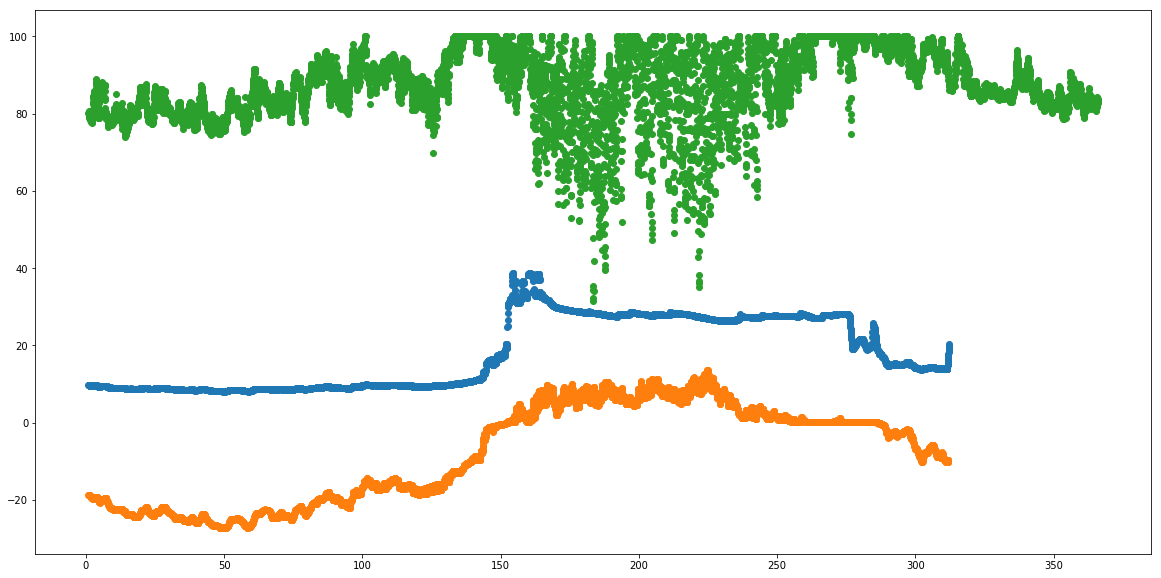

In [193]:
year = 2013.0
year2 = 2016.0
plt.figure(figsize=(20,10))
plt.scatter(r_c1.DOYh[r_c1.Year == year], r_c1.moi[r_c1.Year == year])
plt.scatter(r_c1.DOYh[r_c1.Year == year], r_c1.soiltemp[r_c1.Year == year])
plt.scatter(r_c1.DOYh[r_c1.Year == year], r_c1.rh[r_c1.Year == year])
plt.show()

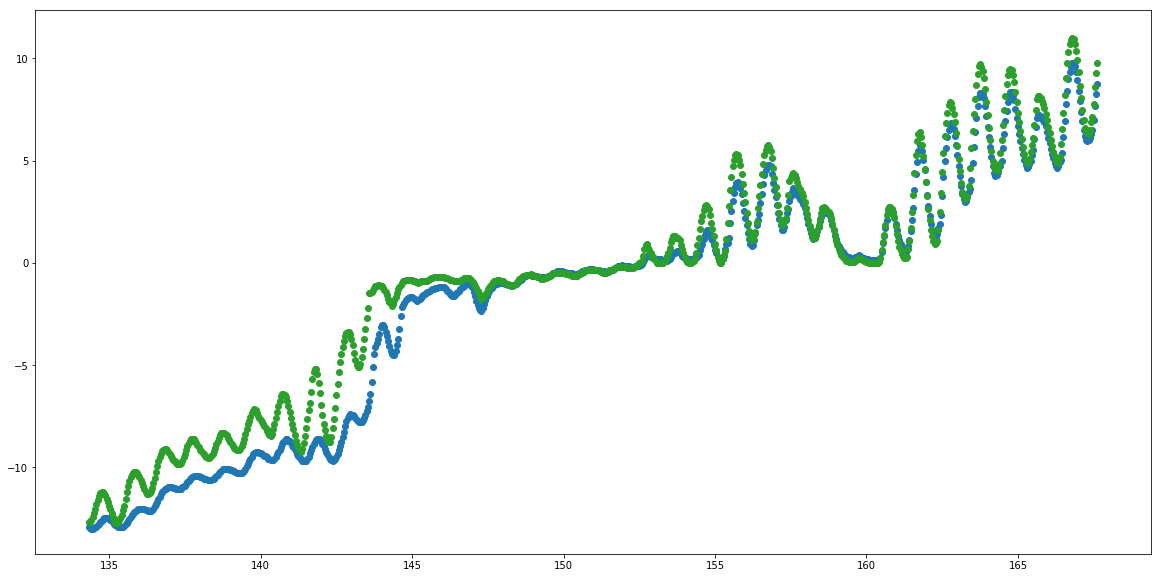

In [96]:
year = 2013.0
start = 3200
end = 4000
plt.figure(figsize=(20,10))
plt.scatter(r_c1.DOYh[r_c1.Year == year][start:end], r_c1.soiltemp[r_c1.Year == year][start:end])
plt.scatter(r_c2.DOYh[r_c2.Year == year][start:end], r_c2.soiltemp[r_c2.Year == year][start:end])
plt.scatter(r_c3.DOYh[r_c3.Year == year][start:end], r_c3.soiltemp[r_c3.Year == year][start:end])
plt.show()

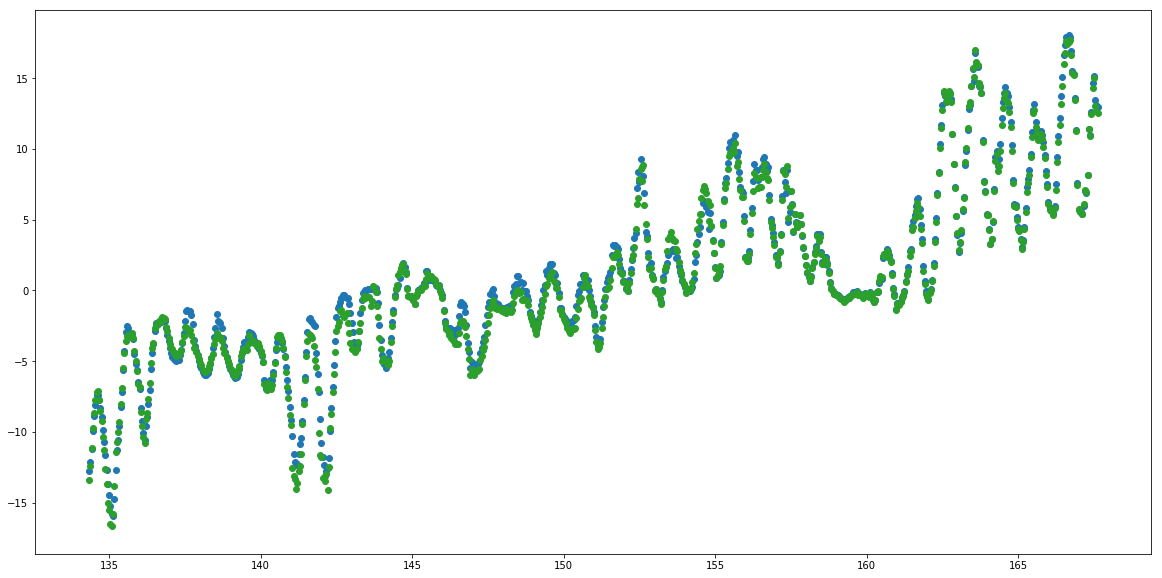

In [97]:
year = 2013.0
start = 3200
end = 4000
plt.figure(figsize=(20,10))
plt.scatter(r_c1.DOYh[r_c1.Year == year][start:end], r_c1.airtemp[r_c1.Year == year][start:end])
plt.scatter(r_c2.DOYh[r_c2.Year == year][start:end], r_c2.airtemp[r_c2.Year == year][start:end])
plt.scatter(r_c3.DOYh[r_c3.Year == year][start:end], r_c3.airtemp[r_c3.Year == year][start:end])
plt.show()

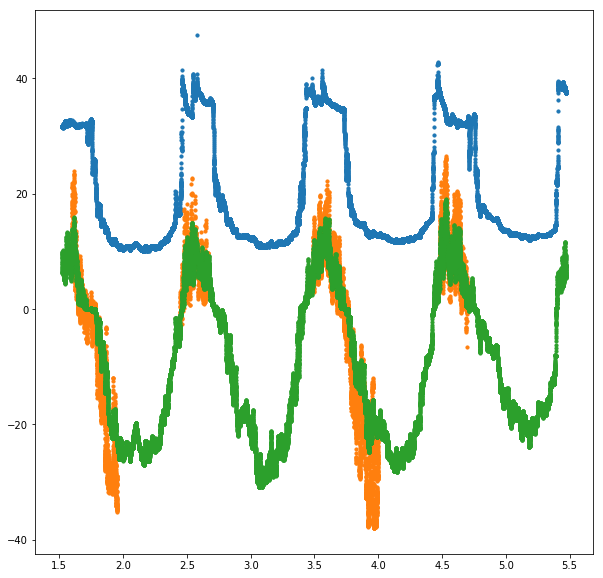

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(r_p1.year_doy,r_p4.moi.values,s=10)
plt.scatter(r_p1.year_doy,r_p4.airtemp,s=10)
plt.scatter(r_p1.year_doy,r_p4.soiltemp,s=10)

plt.show()

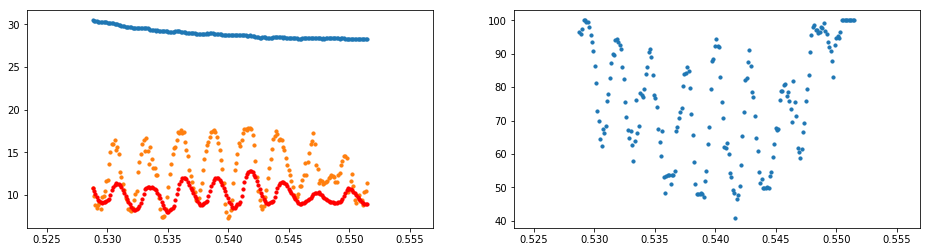

In [8]:
plt.figure(figsize=(16,4))
s=0
e=200
plt.subplot(121)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.airtemp[s:e],s=10)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.soiltemp[s:e],s=10,c="r")
plt.subplot(122)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.rh[s:e],s=10)
plt.show()

In [9]:
r_p1.year_doy.values

array([ 0.52876712,  0.52888128,  0.52899543, ...,  5.47340183,
        5.47351598,  5.47363014])

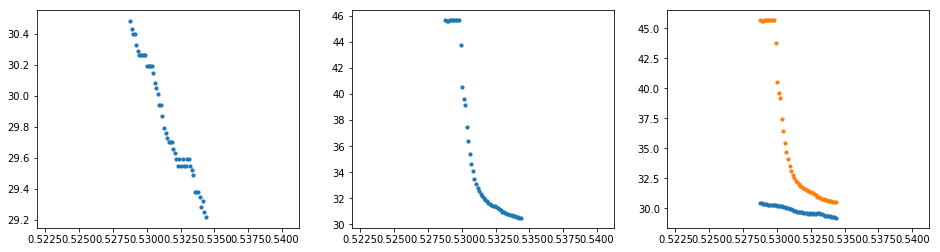

In [10]:
plt.figure(figsize=(16,4))
s=0
e=50
plt.subplot(131)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.subplot(132)
plt.scatter(r_c1.year_doy.values[s:e],r_p1.moi.values[s:e],s=10)
plt.subplot(133)
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.scatter(r_c1.year_doy.values[s:e],r_p1.moi.values[s:e],s=10)
plt.show()

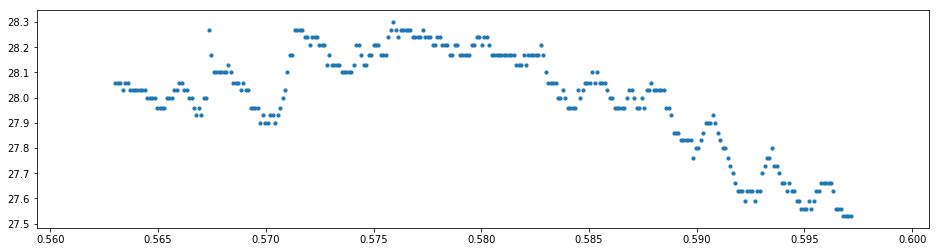

In [11]:
plt.figure(figsize=(16,4))
s=300
e=600
plt.scatter(r_p1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.show()

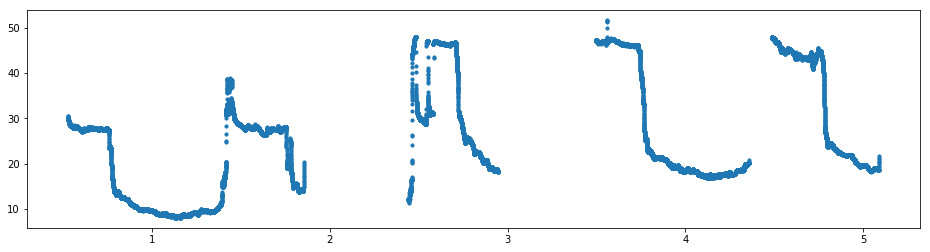

In [188]:
plt.figure(figsize=(16,4))
s=0
e=40000
plt.scatter(r_c1.year_doy.values[s:e],r_c1.moi.values[s:e],s=10)
plt.show()

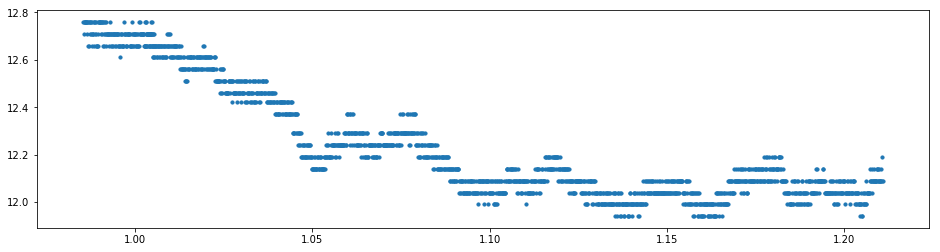

In [207]:
plt.figure(figsize=(16,4))
s=4000
e=6000
plt.scatter(r_p1.year_doy.values[s:e],r_wp1.moi.values[s:e],s=10)
plt.show()

In [ ]:
plt.figure(figsize=[12,12])
plt.scatter(r_c1.moi, r_c1.rh)
plt.show()

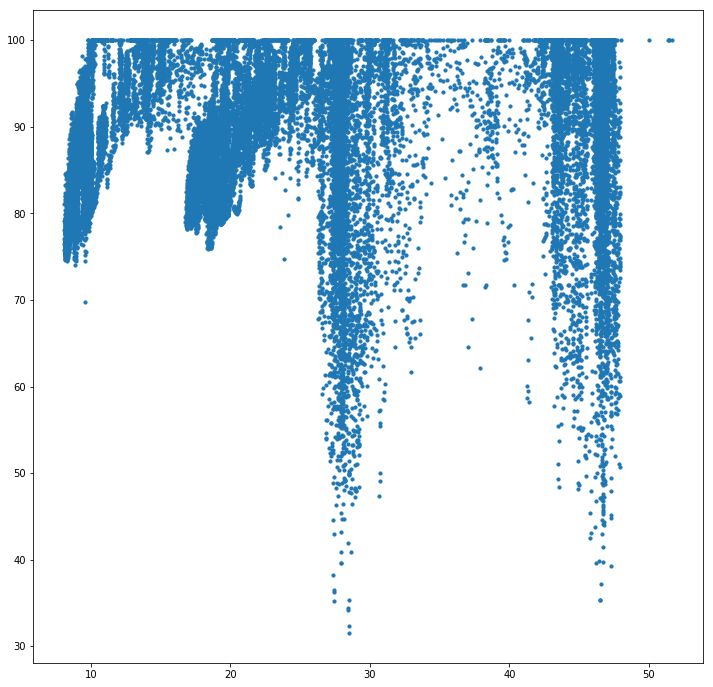

In [152]:
plt.figure(figsize=[12,12])
plt.scatter(r_c1.moi, r_c1.rh,s=10)
plt.show()

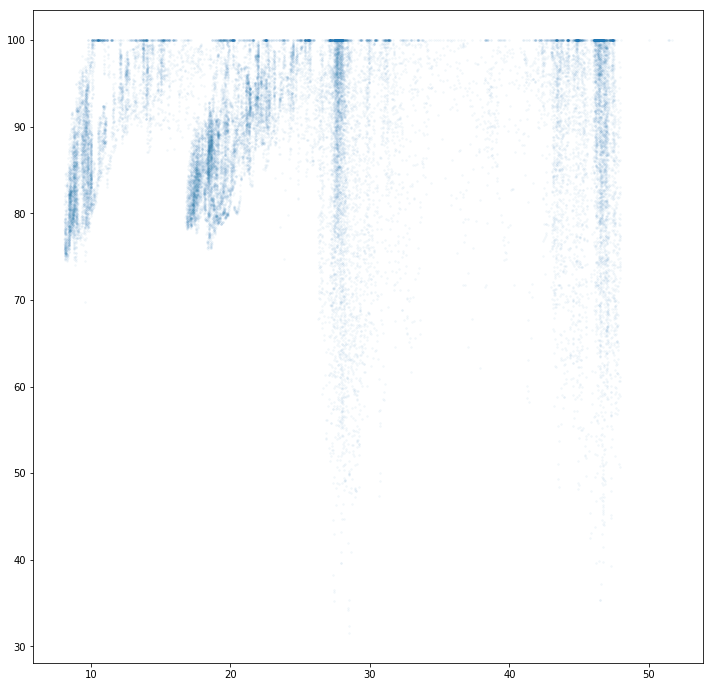

In [153]:
plt.figure(figsize=[12,12])
plt.scatter(r_c1.moi, r_c1.rh,s=3,alpha=0.03)
plt.show()

In [240]:
def dr_moi_rh(mon):
    y=2013
    plt.scatter(r_c1.moi[r_c1.Month==mon][r_c1.Year==y], r_c1.rh[r_c1.Month==mon][r_c1.Year==y])
    plt.show()
def dr_moi_rh_(mon):
    y=2013
    plt.scatter(r_c1.moi[r_c1.Year==y][r_c1.Month==mon], r_c1.rh[r_c1.Year==y][r_c1.Month==mon])
def dr_moi_rh_mon_(mon):
    y=2013
    plt.scatter(r_c1.moi[r_c1.Year==y][r_c1.Month==mon],r_c1.rh[r_c1.Year==y][r_c1.Month==mon],c=r_c1.Hour[r_c1.Year==y][r_c1.Month==mon],cmap = "hot")
def dr_moi_rh_mon_1(mon,hour):
    y=2013
    plt.scatter(r_c1.moi[r_c1.Year==y][r_c1.Month==mon][r_c1.Hour==hour],r_c1.rh[r_c1.Year==y][r_c1.Month==mon][r_c1.Hour==hour], c = r_c1.DOY[r_c1.Year==y][r_c1.Month==mon][r_c1.Hour==hour],cmap="hot")
def dr_moi_rh():
    plt.figure(figsize=(15,15))
    for i in range(12):
        plt.subplot(4,3,i+1)
        dr_moi_rh_(i+1)
    plt.show()
def dr_moi_rh_mon():
    plt.figure(figsize=(15,15))
    for i in range(12):
        plt.subplot(4,3,i+1)
        dr_moi_rh_mon_(i+1)
    plt.show()


def dr_moi_rh_mon1(hour):
# no needed!
plt.figure(figsize=(15,15))
    for i in range(12):
        plt.subplot(4,3,i+1)
        dr_moi_rh_mon_1(i+1,hour)
    plt.show()
    

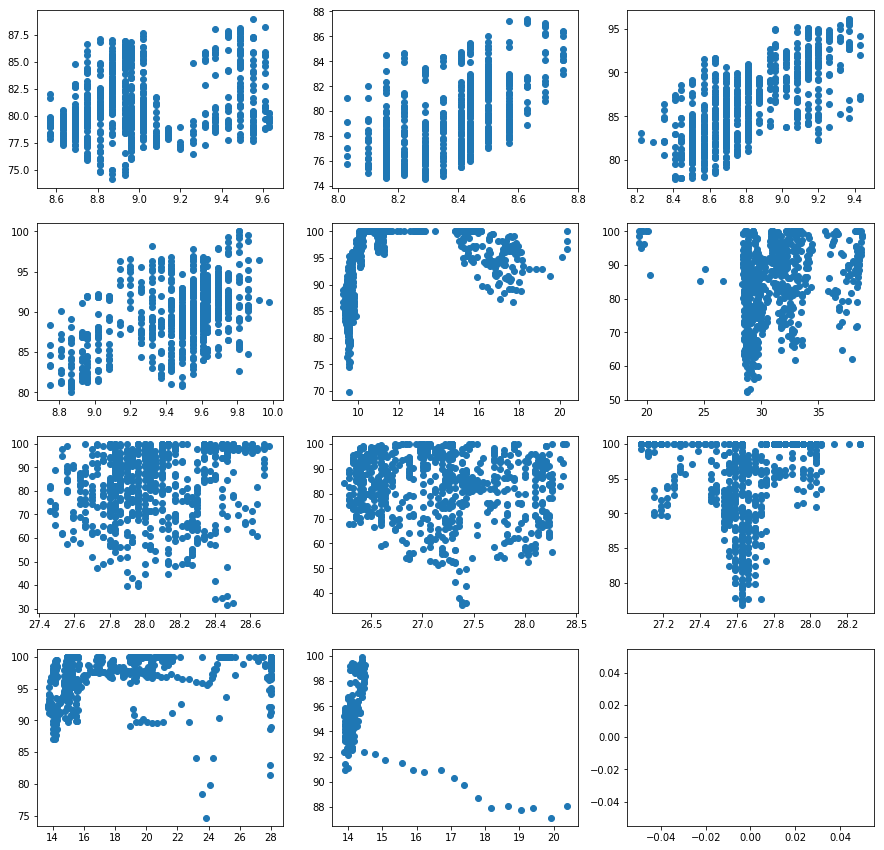

In [245]:
dr_moi_rh()

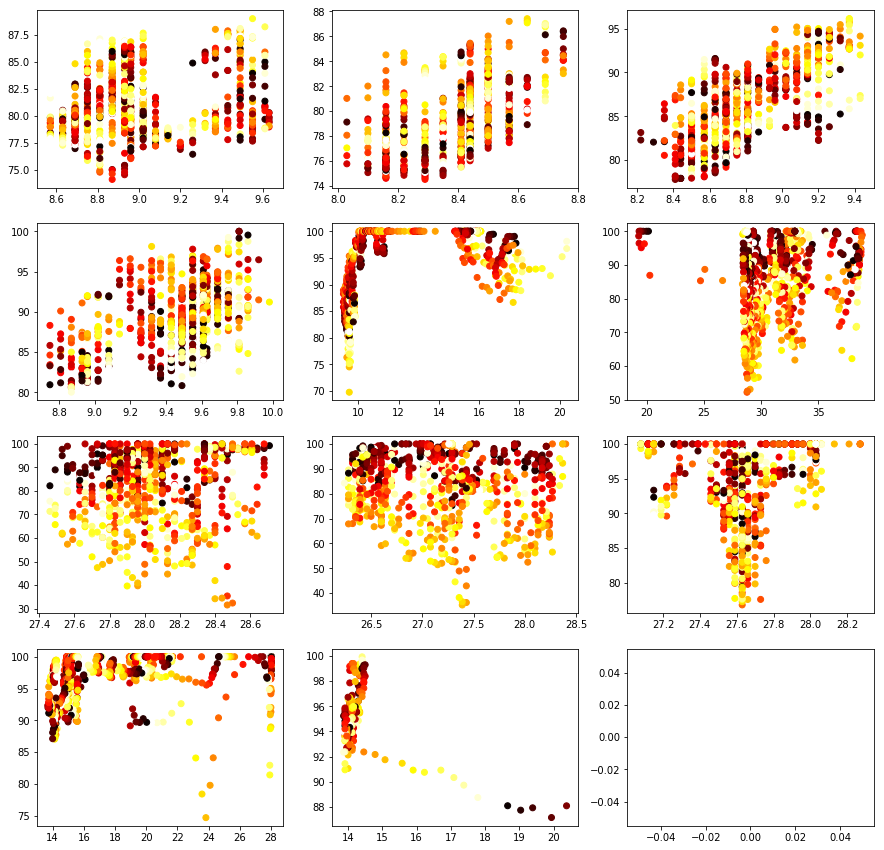

In [242]:
dr_moi_rh_mon()

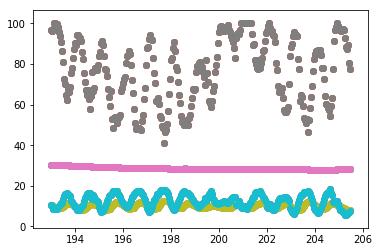

In [159]:
start= 0
end = 300

plt.scatter(r_c1.DOYh[start:end], r_c1.moi[start:end])
plt.scatter(r_c1.DOYh[start:end], r_c1.rh[start:end])
plt.scatter(r_c1.DOYh[start:end], r_c1.soiltemp[start:end])
plt.scatter(r_c1.DOYh[start:end], r_c1.airtemp[start:end])
plt.show()

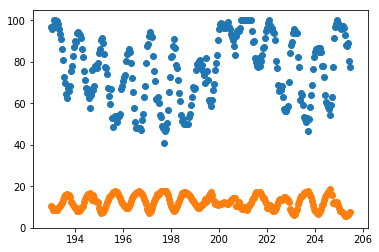

In [164]:
start= 0
end = 300


plt.scatter(r_c1.DOYh[start:end], r_c1.rh[start:end])
plt.scatter(r_c1.DOYh[start:end], r_c1.airtemp[start:end])
plt.show()

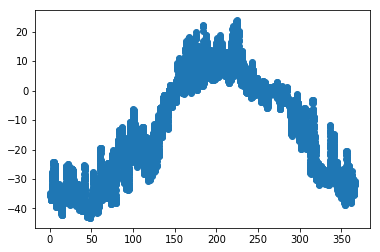

In [169]:
plt.scatter(r_c1.DOYh[r_c1.Year == 2013.0], r_c1.airtemp[r_c1.Year == 2013.0])
plt.show()

In [181]:
t_m.temp


0     -70
1     -69
2     -68
3     -67
4     -66
5     -65
6     -64
7     -63
8     -62
9     -61
10    -60
11    -59
12    -58
13    -57
14    -56
15    -55
16    -54
17    -53
18    -52
19    -51
20    -50
21    -49
22    -48
23    -47
24    -46
25    -45
26    -44
27    -43
28    -42
29    -41
       ..
140    70
141    71
142    72
143    73
144    74
145    75
146    76
147    77
148    78
149    79
150    80
151    81
152    82
153    83
154    84
155    85
156    86
157    87
158    88
159    89
160    90
161    91
162    92
163    93
164    94
165    95
166    96
167    97
168    98
169    99
Name: temp, Length: 170, dtype: int64

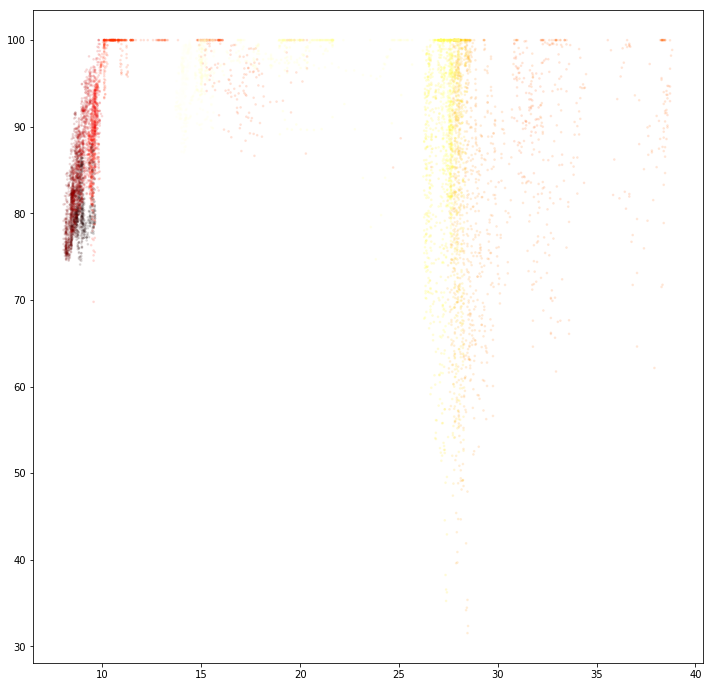

In [236]:
D = 3
y = 2013
plt.figure(figsize=(12,12))
plt.scatter(r_c1.moi[r_c1.Year==y],r_c1.rh[r_c1.Year==y], c = r_c1.DOYh[r_c1.Year==y],cmap="hot",alpha=0.1,s=3)
plt.show()

In [218]:
r_c1

,timestamp,Year,DOY,Month,Hour,DOYh,block,treatment,moi,soiltemp,airtemp,rh,year_doy
0,2012-07-11 00:00:00,2012.0,193.0,7.0,0.0,193.000000,1.0,C,30.48,10.810,10.761,96.556,0.528767
20,2012-07-11 01:00:00,2012.0,193.0,7.0,1.0,193.041667,1.0,C,30.43,10.443,9.903,95.973,0.528881
40,2012-07-11 02:00:00,2012.0,193.0,7.0,2.0,193.083333,1.0,C,30.40,10.075,8.841,97.385,0.528995
60,2012-07-11 03:00:00,2012.0,193.0,7.0,3.0,193.125000,1.0,C,30.40,9.706,8.519,100.000,0.529110
80,2012-07-11 04:00:00,2012.0,193.0,7.0,4.0,193.166667,1.0,C,30.33,9.460,8.866,100.000,0.529224
100,2012-07-11 05:00:00,2012.0,193.0,7.0,5.0,193.208333,1.0,C,30.29,9.312,9.015,99.609,0.529338
120,2012-07-11 06:00:00,2012.0,193.0,7.0,6.0,193.250000,1.0,C,30.26,9.188,8.369,99.575,0.529452
140,2012-07-11 07:00:00,2012.0,193.0,7.0,7.0,193.291667,1.0,C,30.26,9.089,9.756,98.034,0.529566
160,2012-07-11 08:00:00,2012.0,193.0,7.0,8.0,193.333333,1.0,C,30.26,9.139,9.854,95.708,0.529680
180,2012-07-11 09:00:00,2012.0,193.0,7.0,9.0,193.375000,1.0,C,30.26,9.213,10.492,93.492,0.529795
